    v1.1 2018/10/23 JLC Ajout image architecture réseau + correction fautes de frappe
    v1.2 2019/06/13 BA  MAJ par Benjamin AILLOUD (stage L2 informatique)
    v2.0 2019/06/16 JLC Reformulation version 2.
    V2.1 2019/10/29 JLC Consolidation des versions keras 2.2.4 / tensorflow 1.13.1 / numpy 16.1

<span style="font-weight:bold;color:blue;font-family:arial;font-size:xx-large;">
    Machine learning avec les modules Python Keras & tensorflow 
</span>

<span style="font-weight:bold;color:blue;font-family:arial;font-size:x-large;">
    Conception / entraînement / évaluation d'un réseau de neurones dédié à la reconnaissance de chiffres manuscrits.</span>

<div class="alert alert-block alert-info">
<b>Info:</b> Document initialement inspiré du travail de Jason Brownlee : *Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras* publié en juin 2016 à l'adresse https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
</div>

# A/ Quelques concepts fondamentaux autour des réseaux de neurones

### Le neurone artificiel
C'est une unité de traitement informatique programmée pour calculer la valeur de sa **fonction d'activation** en un point défini par la **combinaison linéaire de ses entrées** $\Sigma_i w_i x_i - b$ :

<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/nn_1.png" width="600" >
    (crédit image : JLC)
</p>

L'entrée *Bias* reçoit le stimuli `-1` affecté du poids $b$ pour donner une **translation** (décalage) dans la fonction d'activation.

### Fonction d'activation
Les principaux rôles des fonctions d'activation des neurones artificiels sont :
- donner au neurone artificiel un comportement **non linéaire** (avec par exemple des mécanismes de seuil, de saturation...)
- fixer la plage de sortie de la valeur calculée par le neurone (par exemple sortie dans l'intervalle $[-1 ; 1]$, ou $[0 ; +\infty[$

Exemples de fonction d'activation couramment utilisées :<br />
<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/activationFunctions.png"> 
    (crédit image : JLC)
</p>

### Banque d'images MNIST

Dans ce travail, nous utiliserons les images de la banque MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST propose des images en ton de gris de 28 $\times$ 28 pixels, correspondant à des matrice de 28 $\times$ 28 d'entiers compris entre 0 et 255 :
<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/MnistExamples.png" width="500" >
    (crédit image : Josef Steppan — Travail personnel, CC BY-SA 4.0, commons.wikimedia.org/w/index.php?curid=64810040)
</p>

L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

### Structure du réseau à construire 
Dans un premier temps nous allons construire un simple *réseau dense*, avec :
- une **couche d'entrée** de 784 valeurs comprises entre 0 et 1 (les pixels de l'image 28 $\times$ 28 mis sous forme d'un vecteur de 784 valeurs),
- une **couche cachée** de 784 neurones utilisant la fonction d'activation `relu`,
- une **couche de sortie** à 10 neurones, pour la classification des images en 10 classes associées aux chiffres {0,1,2...9}, utilisant la fonction d'activation `softmax` adaptée aux traitements de classification.

<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/archiReseau.png" width="900">
    (crédit image : JLC)
</p>

La fonction d'activation `softmax` utilisée pour les 10 neurones de la couche de sortie permet de "faire ressortir" la sortie $y_i$ de valeur la plus grande : `softmax` donne une valeur très proche de 1 pour le neurone fournissant la plus grande valeur $y_i$, alors que pour tous les autres neurones, la valeur calculée par `softmax` sera proche de zero.

<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/softmax.png" width="400">
    (crédit image : JLC)
</p>

Remarques : 
- Chaque neurone de la première couche cachée reçoit 785 entrées : les 784 valeurs des pixels de l'image plus l'entrée -1. 
- Il y a dons 785 inconnues pour chaque neurone : les 784 poids $w_i$ affectés à chaque entrée $x_i$, plus le  poids $b$ affecté à l'entrée -1 (le biais).
- on compte donc 785 $\times$ 784 inconnues pour la couche cachée et 785 $\times$ 10 inconnues pour la couche de sortie : soit un total de 623290 inconnues dont la valeur doit être optimisée par l'algorithme d'apprentissage du réseau.

C'est un algorithme de **retropropagation de l'erreur** entre valeur attendue et valeur prédite par le réseau qui permet de modifier les valeurs des poids des différentes couches pour minimiser l'erreur. Au fur et à mesure des apprentissages successifs, cette modification des poids du réseau de neurones tend vers un état qui constitue le réseau entraîné.

#  B/ Environnement Python de travail

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:large"> 
    Les développement en Python doivent se faire dans un <span style="font-weight:bold;">environnement Python 3.6 dédié</span> : voir le document <span style="font-style:italic">EnvironnementPython.pdf</span> si vous n'avez pas encore créé d'environnement Python dédié pour le travail avec les modules Keras et tensorflow.
</span>
</div>

### Environnement Python dédié
Vérification :
- de la version de Python : doit être 3.6.8 ou 3.6.9
- de la version de keras : doit être 2.2.4
- de la version de tensorflow : doit être 1.13.1
- de la version de OpenCV : doit être 3.4.x

In [1]:
import sys, keras, cv2
import tensorflow as tf
print(f"Version de Python    : {sys.version.split()[0]}")
print(f"Version, de Keras    : {keras.__version__}")
print(f"Version de tensorflow: {tf.__version__}")
print(f"Version, de OpenCV   : {cv2.__version__}")

Using TensorFlow backend.


Version de Python    : 3.6.9
Version, de Keras    : 2.2.4
Version de tensorflow: 1.13.1
Version, de OpenCV   : 3.4.2


La documentation du module Python Keras (en anglais) est disponible sur https://keras.io.

Incrustation des tracés matplotlib dans le cahier IPython et import de modules utiles :

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# C/ Travail à faire

# 1 -- Récupération du jeu de données MNIST :

https://fr.wikipedia.org/wiki/Base_de_données_MNIST : La base de données MNIST (*Mixed National Institute of Standards and Technology*), est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.<br /><br />
L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

In [3]:
# Load data from https://www.openml.org/d/554
from keras.datasets import mnist
(image_train, etiq_train), (image_test, etiq_test) = mnist.load_data() 

<span style="color:blue;font-family:arial">Faire afficher le type des objets `image_train`, `etiq_train`, `image_test` et `etiq_test` :</span>

In [4]:
objs = (image_train, etiq_train, image_test, etiq_test)
for o in objs: print(type(o))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<span style="color:blue;font-family:arial">Faire afficher les attributs `shape` et `dtype` des tableaux `image_train`, `etiq_train`, `image_test` et `etiq_test` -> interpréter les réponses :</span>

In [5]:
for o in objs: print(o.shape, o.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


On a bien 60000 matrice d'entiers 28 x 28 avec les 60000 étiquettes et les 10000 matrice d'entiers 28 x 28 avec les 10000 étiquettes

## 1.1 -- Vérification des étiquettes des données : 

<span style="color:blue;font-family:arial">Faire afficher les 10 premières valeurs de `etiq_train` et `etiq_test` ; interpréter les réponses. </span>

In [6]:
print(etiq_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [7]:
print(etiq_test[:10])

[7 2 1 0 4 1 4 9 5 9]


## 1.2 -- Visualisation des images MNIST  :

<span style="color:blue;font-family:arial;">Avec la fonction `imshow` du module `matplotlib.pyplot` faire afficher la 601-ème image du tableau `image_train`. Indications :<br />

- utiliser `plt.figure(figsize=(4,4))`;<br />
- passer l'argument `cmap='binary'` à la fonction `imshow`;<br/>
- enlever les graduations en X et Y avec l'instruction  `plt.xticks([]); plt.yticks([])`.</span>

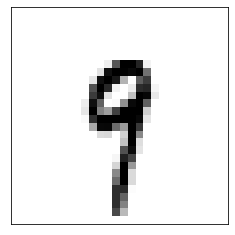

In [8]:
plt.figure(figsize=(4,4))
import matplotlib.pyplot as plt
plt.imshow(image_train[600],cmap='binary')
plt.xticks([]) ; plt.yticks([]);

<span style="color:blue;font-family:arial">Vérifier que l'étiquette associée à `image_train[600]` est bien `9` :</span>

In [9]:
etiq_train[600]

9

<span style="color:blue;font-family:arial">Écrire une fonction `plot_image` qui prend les arguments 'qui vont bien' pour afficher les images MNIST commençant au rang `r` sur `L` lignes et `C` colonnes (utiliser `plt.subplot` pour faire un quadrillage d'images). La figure affichée doit avoir pour dimensions 10 x 10 pouces.

In [10]:
def plot_image(r,L,C):
    plt.figure(figsize=(10,10))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(image_train[r+i],cmap='binary', interpolation='none')
        plt.xticks([])
        plt.yticks([])


<span style="color:blue;font-family:arial">Fait afficher 100 images à partir de la 600 ème dans une grille de 10x10 : </span>

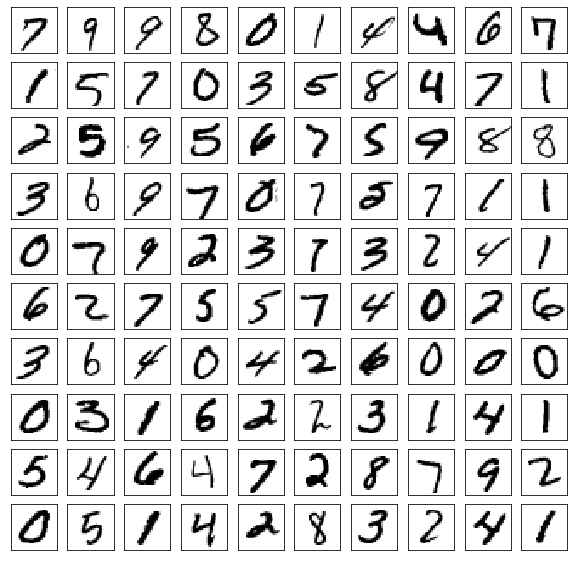

In [11]:
plot_image(599, 10, 10)

# 2 -- Pré-traitement des données

**Le pré-traitement des données constitue une des étapes fondamentales de l'apprentissage des réseaux de neurones.**

Pour adapter les données au réseau de neurones, on doit transformer les matrice d'entiers `uint8` représentant les images 28 x 28 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1.$

## 2.1 -- Transformation des matrices d'entrée en vecteurs normalisés :

In [12]:
nb_image_train, nb_image_test = image_train.shape[0], image_test.shape[0]
nb_pixels = image_train.shape[1] * image_train.shape[2]   # 28 x 28 = 784 pixels

# mise 'à plat' des matrices sous forme de vecteurs de floats 
# Indications: utiliser les méthodes 'reshape(new_shape)' et astype('float32') de ndarray).
x_train = image_train.reshape((nb_image_train, nb_pixels)).astype('float32')
x_test  = image_test.reshape((nb_image_test, nb_pixels)).astype('float32')

# normalisation des tableaux X_train et X_test :
x_train = x_train/255
x_test  = x_test/255

<span style="color:blue;font-family:arial">Vérifier la tailles des tableaux `x_train` et `x_test`  :</span>

In [13]:
print(f"Dimensions du tableu x_train: {x_train.shape}")
print(f"Dimensions du tableu x_test : {x_test.shape}")

Dimensions du tableu x_train: (60000, 784)
Dimensions du tableu x_test : (10000, 784)


<span style="color:blue;font-family:arial">Vérifier les valeurs min et max des tableaux `x_train` et `x_test`  :</span>

In [14]:
print(f"min et max de x_train: {x_train.min()}, {x_train.max()}")
print(f"min et max de x_test : {x_test.min()}, {x_test.max()}")

min et max de x_train: 0.0, 1.0
min et max de x_test : 0.0, 1.0


## 2.2 -- *Hot coding* des étiquettes :

Les étiquettes des images sont des valeurs entières comprises entre 0 et 9. Pour traiter efficacement le problème de classification, on utilise la technique de `hot coding` qui remplace les valeurs des différentes classes par un vecteur comportant autant d'éléments que de classes à choisir.<br />
Par exemple :
- l'étiquette `0` sera transformée en le vecteur `[1 0 0 0 0 0 0 0 0 0]`.
- l'étiquette `3` sera transformée en le vecteur `[0 0 0 1 0 0 0 0 0 0]`.
- l'étiquette `9` sera transformée en le vecteur `[0 0 0 0 0 0 0 0 0 9]`.

Pour réaliser le codage des étiquettes, on utilise la fonction `to_categorical` du module `keras.utils.np_utils` :

In [15]:
from keras.utils.np_utils import to_categorical
# 'hot encoding' des sorties :
y_train = to_categorical(etiq_train)
y_test  = to_categorical(etiq_test)

<span style="color:blue;font-family:arial">Faire afficher les 10 premières valeurs de `etiq_train` et les 10 premières valeurs `hot encoded` de `y_train` :</span>

In [16]:
etiq_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
len(y_train[0])

10

# 3 -- Construction du réseau de neurones :

On va maintenant construire un réseau de neurone **séquentiel** (cf https://keras.io/models/sequential ) en **4 lignes** Python à l'aide du module **keras** qui permet une manipulation de haut niveau des outils proposés par le module **tensorflow**.<br />

Les spécifications du réseau de neurones à construire sont :
- les entrées sont constituées des 784 pixels, mis sous forme d'un vecteur normalisé ;
- le réseau de neurones comporte une première couche de 784 neurones utilisant la fonction d'activation `relu` (*retified linear unit*, voir https://keras.io/activations) ;
- la couche de sortie comporte 10 neurones utilisant la fonction d'activation `softmax` pour convertir les sorties en valeur de probalibilités permettant de choisir une des 10 classes ;
- la fonction d'erreur (différence entre étiquette et valeur prédite par le réseau) est `Logarithmic loss` (dans Keras elle coorepnd à la *loss function* `categorical_crossentropy`) ;
- l'algorithme de descente de gradient ADAM est utilisé pour l'optimisation des poids des neurones par rétro-progation de l'erreur. 

La **fonction d'erreur** (*loss function*) utilisée pour quantifier l'erreur entre l'étiquette associée aux données d'entrée est disponible dans keras sous le nom `categorical_crossentropy`:

<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/CrossEntropy.png" width=650>
    (crédit image : vidéo "Deep Learning TensorFlow" de Martin Gorner)
</p>

## Rendre les tirages aléatoires reproductibles

Les poids d'un réseau de neurones sont initialisés par tirage aléatoire. Lorsqu'on invoque plusieurs fois de suite des générateurs aléatoires comme `numpy.random.rand` par exemple, on cconstate qu'à chaque invocation, on obtient une suite de valeurs aléatoires différentes :

In [19]:
print(np.random.rand(5))

[0.28900251 0.77152225 0.47383632 0.53065993 0.48269495]


In [20]:
print(np.random.rand(5))

[0.22847063 0.9282376  0.56364877 0.13138361 0.87592869]


Ceci présente un gros inconvénient car les poids d'un réseau de neurones sont initialisés à la construction du réseau par tirage aléatoire : ceci veut dire qu'à chaque fois qu'on relance le cahier IPYthon par exemple on obtiendra un état initial du réseau différent conduisant à un résultat de réseau entraîné différent !

Pour corriger ce comportement, on fixe la **graine** (*seed*) du générateur `numpy.random` de façon à générer des suites de nombres aléatoires reproductibles :

In [21]:
seed = 43

In [22]:
np.random.seed(seed)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

In [23]:
np.random.seed(seed)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

## Construction du réseau de neurones dense en 4 lignes avec le module Keras :

In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 

tf.logging.set_verbosity(tf.logging.ERROR)  # n'afficher que les ERREURS tf, pas les warnings....
nb_classes = len(y_train[0])
np.random.seed(43)

# les 4 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Dense(nb_pixels, input_dim=nb_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


<span style="color:blue;font-family:arial">Peux-tu retrouver le nombre total de paramètres avec une formule simple ?</span>

In [26]:
print(f"nombre total de paramètres : {784*785 + 10*785}")

nombre total de paramètres : 623290


# 4 -- Entraînement du réseau :

Le modèle est entraîné sur les $60\,000$ images,
- 10 fois de suite (paramètre `epochs`), 
- avec mises à jour des poids toutes les 200 images (paramètre `batch_size`),
- en utilisant :
    - les données d'entrée `x_train` (images)
    - les données de sortie `y_train` (étiquettes).

In [27]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2751 - acc: 0.9211 - val_loss: 0.1445 - val_acc: 0.9570
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1112 - acc: 0.9680 - val_loss: 0.0933 - val_acc: 0.9723
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0710 - acc: 0.9796 - val_loss: 0.0766 - val_acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0504 - acc: 0.9856 - val_loss: 0.0685 - val_acc: 0.9791
Epoch 5/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0362 - acc: 0.9896 - val_loss: 0.0632 - val_acc: 0.9787
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0260 - acc: 0.9932 - val_loss: 0.0591 - val_acc: 0.9805
Epoch 7/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0205 - acc: 0.9950 - val_loss: 0.0590 - val_a

### Tracé des courbes `accuracy` et `loss` :

In [28]:
def plot(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,2,1)
    ax1.plot(history.history['acc'], 'o-',label='Train')
    ax1.plot(history.history['val_acc'], 'o-', label='Test')
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch') 
    ax1.grid()
    ax1.legend(loc='best')
    # Plot training & validation loss values
    ax2 = plt.subplot(1,2,2)
    ax2.plot(history.history['loss'], 'o-', label='Train')
    ax2.plot(history.history['val_loss'], 'o-',  label='Test')
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='best')
    ax2.grid()
    plt.show()

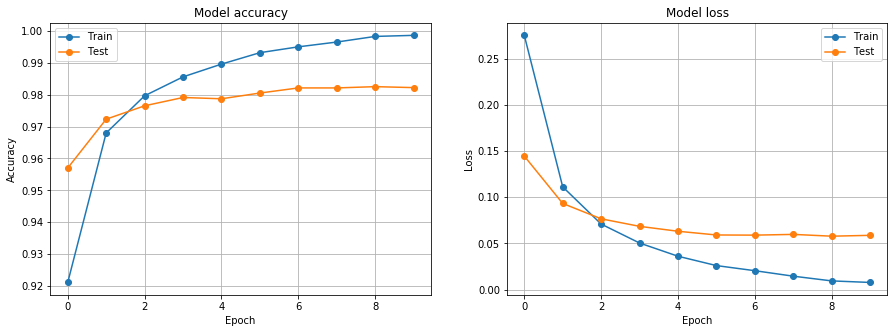

In [29]:
plot(history)

Entrainer le réseau plus longtemps (par augmentation du paramètre `epochs` peut permettre d'aumengenter les performances du réseau... mais les courbes de précision du test (*test accuracy*) restent asymptotiquement voisinnes des 98 %.


# 5/ Vérication de l'apprentissage avec le jeu de test

La méthode `predict`permet de demander au modèle sa prédiction pour une ou plusieurs entrées.<BR />
Exemple de prédition pour une image test numéro i dans le jeu d'images de test (0 <= i <= 10000) :

valeur trouvée par le réseau de neurones : [0.0000 0.0000 0.0000 0.0013 0.0000 0.0000 0.0000 0.0001 0.0000 0.9986]
valeur trouvée arrondie  : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
rep[0].argmax() donne    : 9

La bonne réponse est 9, soit en 'hot coded' : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]


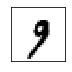

In [30]:
i = 1000
rep = model.predict(x_test[i:i+1])

np.set_printoptions(formatter={'float':'{:0.4f}'.format})
print("valeur trouvée par le réseau de neurones :", rep[0])

np.set_printoptions(formatter={'float':'{:0.1f}'.format})
print("valeur trouvée arrondie  : {}".format(rep[0]))
print("rep[0].argmax() donne    : {}".format(rep[0].argmax()))

plt.figure(figsize=(1,1))
digit = image_test[i]
plt.xticks([]); plt.yticks([])
plt.imshow(digit, cmap='binary');
print(f"\nLa bonne réponse est {etiq_test[i]}, soit en 'hot coded' : {y_test[i]}")

<span style="color:blue;font-family:arial">Écrire les instructions Python pour calculer avec les données de test le pourcentage d'erreur du réseau entrainé.... <br/> 
Conseil: la variable rep contient pour chaque image une liste de 10 probabilités, il pourra être utile d'utiliser la fonction argmax de la librairie numpy pour obtenir le chiffre de plus haute probabilité.</span>


In [31]:
results = model.predict_on_batch(x_test)
bonne_rep = 0
for i, res in enumerate(results):
    bonne_rep += (np.argmax(res) == etiq_test[i])
print(f"taux de réussite : {bonne_rep/len(x_test)*100:.2f} %")

taux de réussite : 98.22 %


# 6/ Évolution du réseau : augmentation du nombre de couches cahées 

On peut essayer de construire un réseau avec plus de couches. Par exemple :
- couche d'entrée avec les 784 pixels
- couche cachée 1 : 784 neurones, fonction d'activation `relu`
- couche cachée 2 : 300 neurones, fonction d'activation `relu`
- couche cachée 3 : 100 neurones, fonction d'activation `relu`    
- couche de sortie : 10 neurone, fonction d'activation `softmax`.

Peux-tu conctruire le réseau `model2` correspondant avec Keras :

In [32]:
nb_classes = len(y_train[0])

np.random.seed(43)
model2 = Sequential()
model2.add(Dense(784, input_dim=nb_pixels, kernel_initializer='normal', activation='relu'))
model2.add(Dense(300, kernel_initializer='normal', activation='relu'))
model2.add(Dense(100, kernel_initializer='normal', activation='relu'))
model2.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model2`, faire afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [33]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 882,050
Trainable params: 882,050
Non-trainable params: 0
_________________________________________________________________


Entraîner le réseau `model2` avec les mêmes données que `model`, et faire tracer les courbes de précission et d'erreur :

In [34]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.2929 - acc: 0.9177 - val_loss: 0.1241 - val_acc: 0.9608
Epoch 2/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0994 - acc: 0.9697 - val_loss: 0.0958 - val_acc: 0.9710
Epoch 3/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0579 - acc: 0.9823 - val_loss: 0.0718 - val_acc: 0.9778
Epoch 4/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0398 - acc: 0.9874 - val_loss: 0.0695 - val_acc: 0.9783
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0296 - acc: 0.9907 - val_loss: 0.0704 - val_acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0227 - acc: 0.9929 - val_loss: 0.0794 - val_acc: 0.9764
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0181 - acc: 0.9940 - val_loss: 0.0657 - 

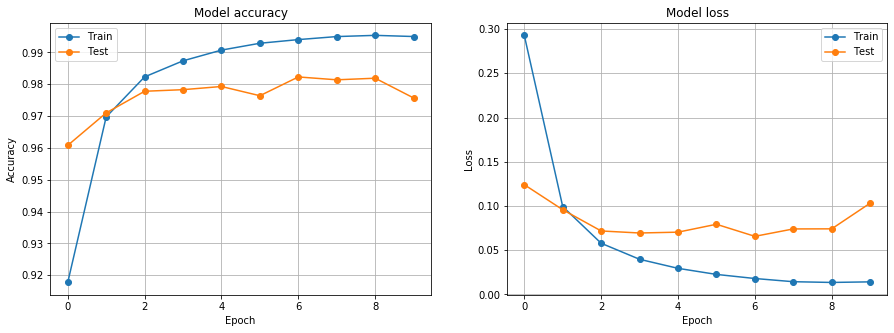

In [35]:
plot(history2)

<span style="color:blue;font-family:arial"> Augmenter le nombre de couches a t'il un impact sur les performances du réseau ?<br />
Que peut on conclure sur l'utilité de complexifier ce type de réseau ? </span>

À priori, on peut voir que l'augmentation du nombre de couches cachées n'a pas un grand impact sur la précision du résea : la reconnaissance lors des tests tourne toujours autour des 98%.
Il semble donc peu utile de complexifier ce type de réseau...

# 7/ Utiliser le réseau avec ses propres images

On va utiliser le réseau entrainé pour voir comment il réagit avec des chiffres "écrits à la main" différents des chiffres de la banque MNIST...<br />
Pour cela on utilise les images du dossier `chiffres` :

In [36]:
import os
images = ['chiffres/'+f for f in os.listdir('chiffres') if f.endswith(".png") or f.endswith(".jpg")]
images.sort()
print(f"Images du dossier 'chiffres' : {images}")

Images du dossier 'chiffres' : ['chiffres/0_jlc.png', 'chiffres/1_jlc.png', 'chiffres/2_jlc.png', 'chiffres/3_jlc.png', 'chiffres/4_jlc.png', 'chiffres/5_jlc.png', 'chiffres/6_jlc.png', 'chiffres/7_jlc.png', 'chiffres/8_jlc.png', 'chiffres/9_jlc.png']


### Lecture des fichiers image avec openCV

In [37]:
import cv2
# lecture des images -> matrices ndarray 28x28 
input_data = [255-cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype  # on doit avoir 4 matrices de 28 x 28 valeurs 

((10, 28, 28), dtype('uint8'))

#### Visualistion des images :

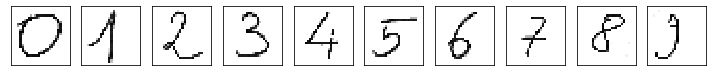

In [38]:
plt.figure(figsize=(15,5))
for i,M in enumerate(input_data):  
    plt.subplot(1,12,i+1)
    plt.imshow(input_data[i], cmap='binary', interpolation='none');
    plt.xticks([]); plt.yticks([])

transformation des matrices 28x28 en vecteurs de float normalisés :

In [39]:
nb_images = input_data.shape[0]
# mise 'à plat' des matrices sous forme de vecteurs de floats :
x_photo = input_data.reshape(nb_images, 28*28).astype('float32')
# normalisation des données :
x_photo /= 255

prédiction du réseau entrainé, avec les images perso :

In [40]:
np.set_printoptions(formatter={'float': '{:0.3f}'.format})  # demander à numpy d'afficher 3 décimales

rep = model.predict(x_photo)
print(rep)

[[0.565 0.003 0.332 0.004 0.001 0.083 0.000 0.005 0.000 0.006]
 [0.000 0.955 0.000 0.014 0.001 0.007 0.008 0.005 0.008 0.003]
 [0.000 0.000 0.944 0.018 0.000 0.008 0.000 0.000 0.029 0.000]
 [0.000 0.000 0.000 0.999 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.992 0.001 0.006 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.004 0.001 0.083 0.000 0.002 0.329 0.348 0.000 0.233 0.000]
 [0.001 0.084 0.326 0.122 0.130 0.019 0.007 0.242 0.067 0.000]
 [0.049 0.007 0.040 0.222 0.012 0.048 0.113 0.000 0.507 0.001]
 [0.000 0.001 0.001 0.994 0.000 0.004 0.000 0.000 0.000 0.000]]


In [41]:
[r.argmax() for r in rep]

[0, 1, 2, 3, 4, 5, 6, 2, 8, 3]

In [42]:
for r in rep:
    print(f"{r.argmax()} avec la probablilité {r.max():.3f}")

0 avec la probablilité 0.565
1 avec la probablilité 0.955
2 avec la probablilité 0.944
3 avec la probablilité 0.999
4 avec la probablilité 0.992
5 avec la probablilité 1.000
6 avec la probablilité 0.348
2 avec la probablilité 0.326
8 avec la probablilité 0.507
3 avec la probablilité 0.994


Le 7 et le 9 ont été vus respectivement comme un 2 et 3 ....

Avec le deuxième réseau dense :

In [43]:
rep = model2.predict(x_photo)
print(rep)

[[0.132 0.000 0.248 0.412 0.002 0.003 0.000 0.079 0.002 0.123]
 [0.000 0.852 0.000 0.009 0.000 0.000 0.001 0.000 0.137 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.007 0.000 0.000 0.039 0.541 0.000 0.412 0.000]
 [0.000 0.001 0.019 0.372 0.002 0.000 0.000 0.005 0.602 0.000]
 [0.074 0.001 0.006 0.001 0.000 0.000 0.278 0.000 0.641 0.000]
 [0.000 0.006 0.000 0.992 0.000 0.000 0.000 0.002 0.000 0.000]]


In [44]:
[r.argmax() for r in rep]

[3, 1, 2, 3, 4, 5, 6, 8, 8, 3]

In [45]:
for r in rep:
    print(f"{r.argmax()} avec la probablilité {r.max():.3f}")

3 avec la probablilité 0.412
1 avec la probablilité 0.852
2 avec la probablilité 1.000
3 avec la probablilité 1.000
4 avec la probablilité 1.000
5 avec la probablilité 1.000
6 avec la probablilité 0.541
8 avec la probablilité 0.602
8 avec la probablilité 0.641
3 avec la probablilité 0.992


Pas beaucoup mieux ....

Les résultats montrent :
- que le réseau à 1 seule couche cachée et à 2 couches cachées donnent quasiment les mêmes performances pour les images MNIST,
- que l'apprentissage d'un réseau dense reste assez sensible à la nature du jeu de données : les images de chiffres hors banque MNIST ne ressemblent pas tout à fait à celles de la banque MNIST, d'où des erreurs de classification avec un simple réseau dense.

# Suite....

Pour aller au-delà des 98% de reconnaissance des chiffres, il faut passer à une autre architecture de réseau plus adaptée au traitement des images : les réseaux **convolutionnels**, traités dans le prochain cahier IPython `TP_MNIS_Keras_convo.ipynb`.

# Autres ressources intéressantes... des vidéos :

In [46]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [47]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [48]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [49]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>